In [14]:
# import pandas lib as pd 
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import stemgraphic 

In [2]:
student_table = '../data/raw/Student_Table.xlsx'
summary_df = pd.read_excel(student_table)
summary_df

,ID,School Enrolled,Months Enrolled,Birthday Month,Distance to Work (whole miles),Height (whole inches),Foot Size (whole inches),Hand Size (whole inches),Sleep (minutes),Homework (minutes)
0,1,Arts and Sciences,12,January,0,60,8,5,360,30
1,2,Applied Science and Technology,6,February,0,62,7,6,400,45
2,3,Business and Management,8,April,5,66,10,7,420,60
3,4,Nursing,10,June,10,68,12,8,440,15
4,5,Public Service,48,July,15,68,14,8,540,75
5,6,Arts and Sciences,48,June,30,70,12,9,480,120
6,7,Applied Science and Technology,36,October,32,72,11,8,320,80
7,8,Applied Science and Technology,32,November,36,75,14,7,440,60
8,9,Applied Science and Technology,15,December,37,77,13,9,420,60
9,10,Applied Science and Technology,7,July,12,62,8,6,420,60


In [25]:
summary_df.sort_values(by = ['Months Enrolled'], inplace=True)
enrolled_sorted = [x for x in summary_df['Months Enrolled']]
enrolled_sum = sum(enrolled_sorted)
print(enrolled_sorted, enrolled_sum)

[1, 3, 3, 4, 5, 6, 6, 6, 7, 8, 10, 12, 12, 12, 15, 15, 24, 24, 32, 36, 48, 48, 48] 385


(<Figure size 540x144 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x2272281efd0>)

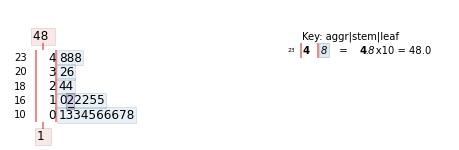

In [12]:
# calling stem_graphic with required parameters, 
# data and scale 
stemgraphic.stem_graphic(enrolled_sorted, scale = 10)

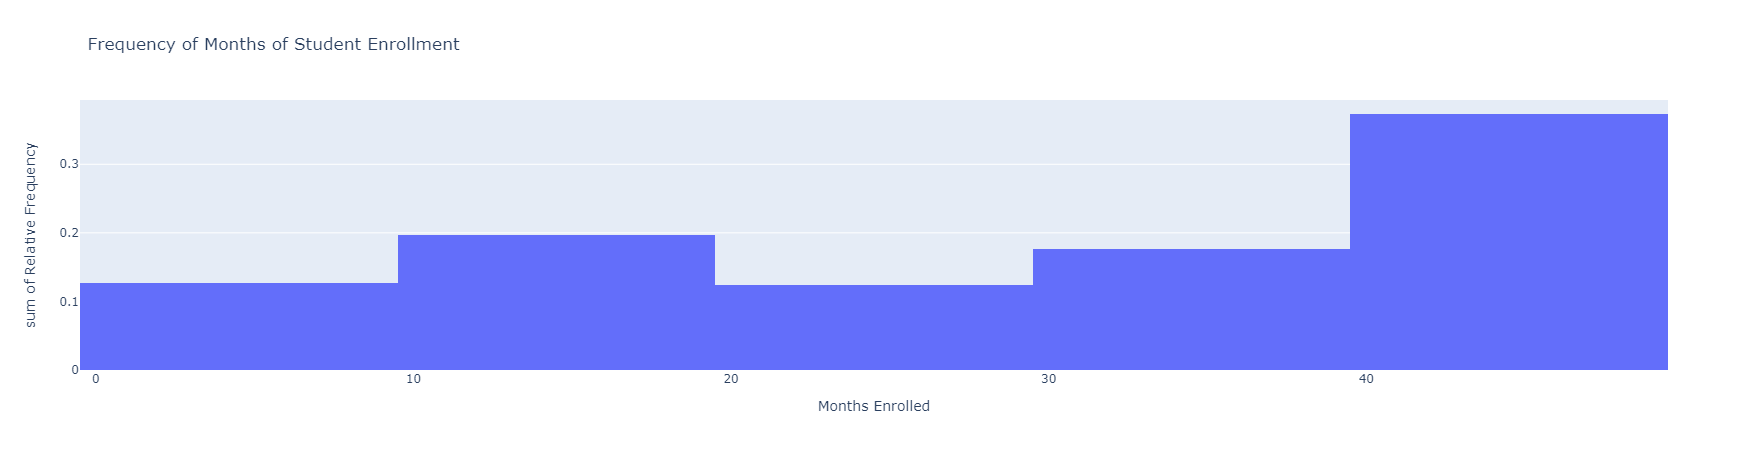

In [33]:
fig = px.histogram(summary_df, x='Months Enrolled', y=summary_df['Months Enrolled']/enrolled_sum, labels = {'y':'Relative Frequency'},  title='Frequency of Months of Student Enrollment')
fig.show()
fig.write_image("../reports/figures/five_sum_hist.png")

# 5 Number Summary: 

The five-number summary involves the calculation of 5 summary statistical quantities: namely:
Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
1st Quartile: The 25th percentile.
3rd Quartile: The 75th percentile.
Minimum: The smallest observation in the sample.
Maximum: The largest observation in the sample.
A quartile is an observed value at a point that aids in splitting 

In [37]:
# With multiple modes its needed to pull the categorical value out of the array
mode_scipy = [row for row in stats.mode(summary_df['Months Enrolled'])][0][0]
print(f"The mode for students enrolled  in this class for months in TESU is {mode_scipy}.")

Summary_mean = np.average(summary_df['Months Enrolled'])
print(f"The mean for students enrolled  in this class for months in TESU is {Summary_mean}.")

Summary_min = summary_df['Months Enrolled'].min()
print(f"The minimum months enrolled for students in thid class is {Summary_min}.")

Summary_max = summary_df['Months Enrolled'].max()
print(f"The maximum months enrolled for students in this class is {Summary_max}.")

median_numpy = np.median(summary_df['Months Enrolled'])
print(f"The median months enrolled for students in thid class is {median_numpy}.")

Summary_std = np.std(summary_df['Months Enrolled'])
print(f"The standard deviation months enrolled for students in thid class is {Summary_std}.")
                         
quartile = summary_df['Months Enrolled'].quantile([0.25,0.5,0.75])
qtile = [q for q in quartile]
Q1 = qtile[0]
print(f"The middle number that falls between the smallest value of the dataset and the median of months enrolled for students in this class is {Q1}.")
Q3 = qtile[2]
print(f"Thecentral point that lies between the median and the highest number of the distribution of months enrolled for students in this class is {Q3}.")

The mode for students enrolled  in this class for months in TESU is 6.
The mean for students enrolled  in this class for months in TESU is 16.73913043478261.
The minimum months enrolled for students in thid class is 1.
The maximum months enrolled for students in this class is 48.
The median months enrolled for students in thid class is 12.0.
The standard deviation months enrolled for students in thid class is 15.039707997004486.
The middle number that falls between the smallest value of the dataset and the median of months enrolled for students in this class is 6.0.
Thecentral point that lies between the median and the highest number of the distribution of months enrolled for students in this class is 24.0.


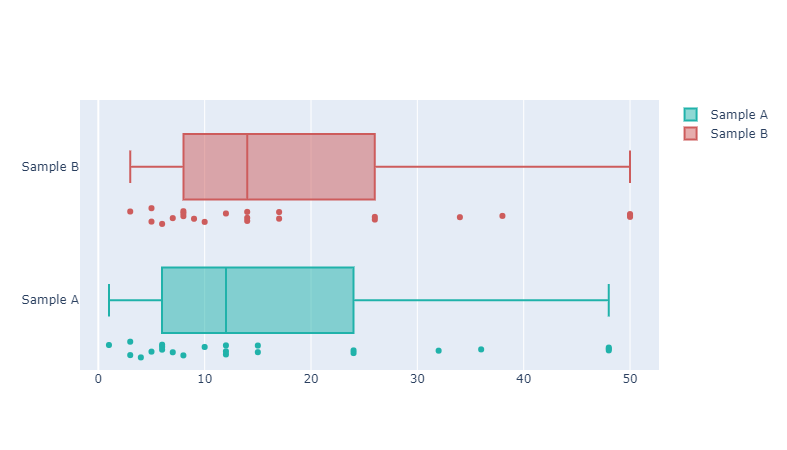

In [18]:
fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x = summary_df['Months Enrolled'], name='Sample A',
                marker_color = 'lightseagreen', boxpoints='all'))
fig.add_trace(go.Box(x = summary_df['Months Enrolled'] + 2, name='Sample B',
                marker_color = 'indianred', boxpoints='all'))
fig.show()
fig.write_image("../reports/figures/five_sum_box.png")

In [35]:
iqr = Q3 - Q1

print(f"The lower quartile of months enrolled is: {Q1}")
print(f"The upper quartile of months enrolled is: {Q3}")
print(f"The interquartile range of months enrolled is: {iqr}")
print(f"The the median of months enrolled is: {median_numpy} ")

lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_enrolled = summary_df.loc[((summary_df['Months Enrolled']/enrolled_sum) < lower_bound) | ((summary_df['Months Enrolled']/enrolled_sum) > upper_bound)]
outlier_enrolled

The lower quartile of months enrolled is: 6.0
The upper quartile of months enrolled is: 24.0
The interquartile range of months enrolled is: 18.0
The the median of occupancy is: 12.0 
Values below -21.0 could be outliers.
Values above 51.0 could be outliers.


,ID,School Enrolled,Months Enrolled,Birthday Month,Distance to Work (whole miles),Height (whole inches),Foot Size (whole inches),Hand Size (whole inches),Sleep (minutes),Homework (minutes)
